In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

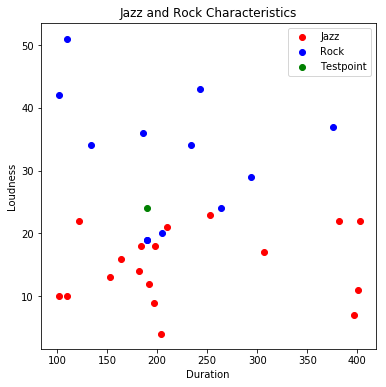

In [2]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

plt.rcParams['figure.figsize'] = 6, 6

plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.scatter(
    190, 24,
    color='green'
)

plt.legend(['Jazz', 'Rock', 'Testpoint'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
X = music[['duration', 'loudness']]
Y = music.jazz

testpoint = [[190, 24]]

In [4]:
def nearest_predict(coordinates=testpoint, dataframe=music, n_neighbors=5):
    nearframe = dataframe
    nearframe['distance'] = (
        (coordinates[0][0] - nearframe.iloc[:, 0])**2 + (coordinates[0][1] - nearframe.iloc[:, 1])**2)**0.5
    voteframe = nearframe.sort_values(by='distance').iloc[0:n_neighbors, :]
    
    if voteframe.jazz.mean() >= 0.5:
        return np.array([1])
    else:
        return np.array([0])

In [5]:
nearest_predict()

array([1])

In [6]:
nearest_predict([[120, 15]])

array([1])

In [7]:
nearest_predict([[120, 45]])

array([0])